In [55]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [56]:
df = pd.read_csv('DATA1.csv').dropna()
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.index = df['Date']

In [57]:
df.head()

,Close,Date
Date,,
2018-10-26,1044.900024,2018-10-26
2018-10-29,1087.800049,2018-10-29
2018-10-30,1057.000000,2018-10-30
2018-10-31,1061.250000,2018-10-31
2018-11-01,1056.250000,2018-11-01


In [58]:
print(df.shape)

(242, 2)


Text(0.5, 1.0, 'REL Autocorrelation plot')

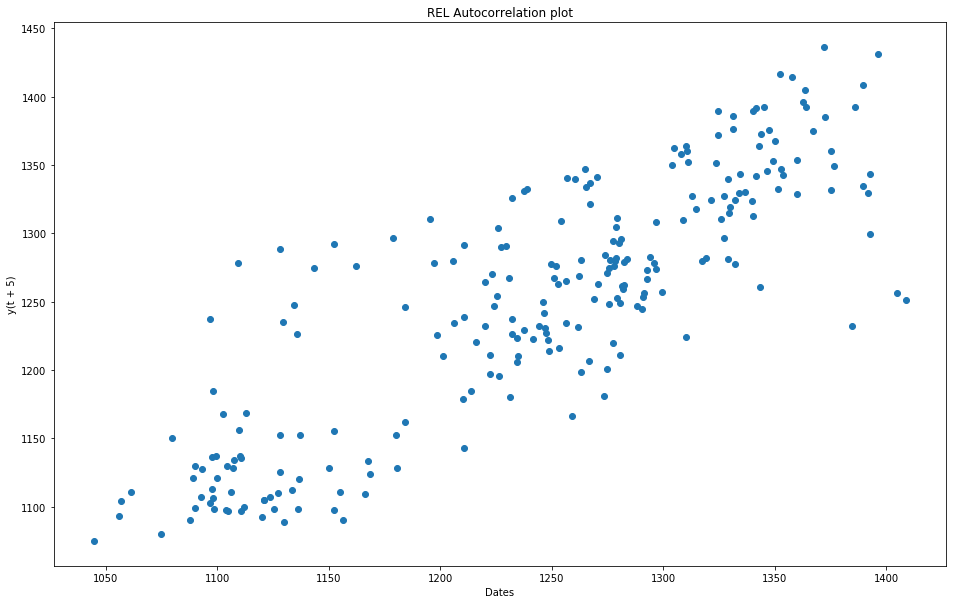

In [59]:
plt.figure(figsize=(16,10))
lag_plot(df['Close'], lag=5)
plt.title('REL Autocorrelation plot')

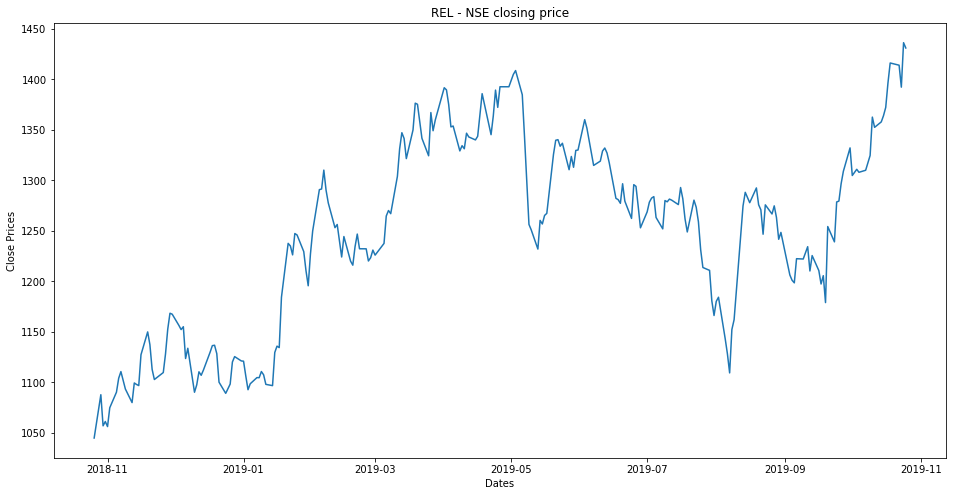

In [48]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#plot of closing price
plt.figure(figsize=(16,8))
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('REL - NSE closing price')
plt.show()

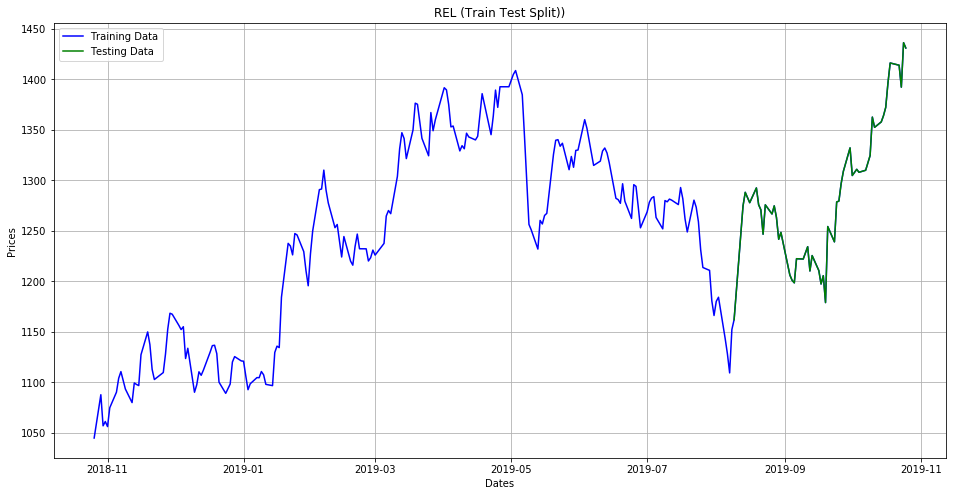

In [49]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.title('REL (Train Test Split))')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label = 'Training Data')
plt.plot(test_data['Close'], 'green', label = 'Testing Data')
plt.legend()

In [50]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [51]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Symmetric mean absolute percentage error: 6.030


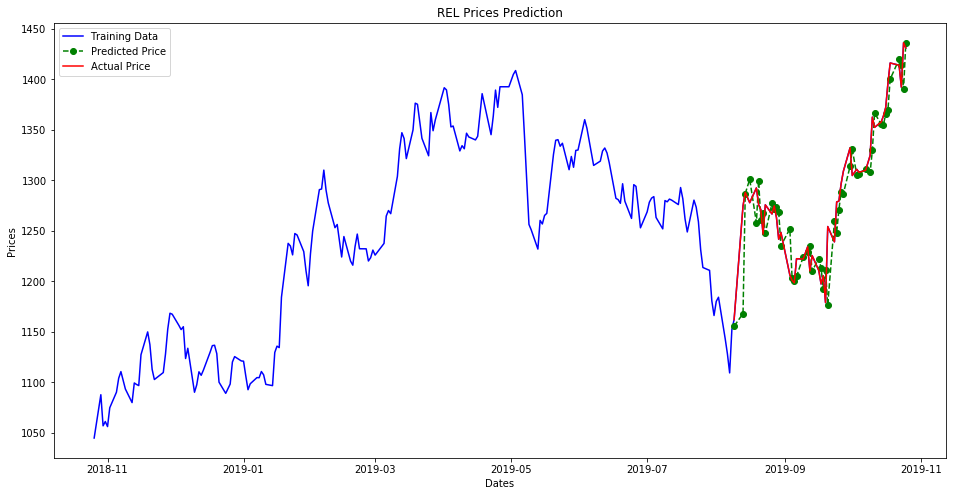

In [52]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('REL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

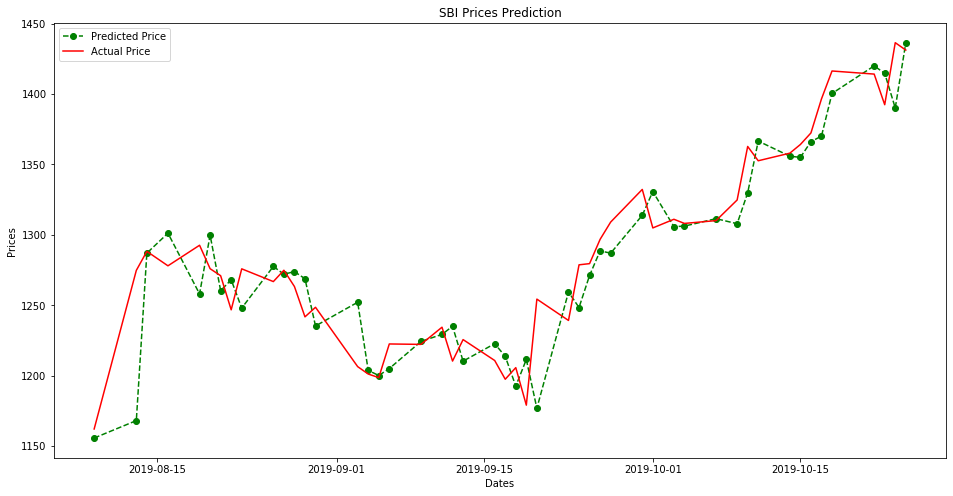

In [60]:
plt.figure(figsize=(16,8))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [40]:
accr = 100 - error2
accr

93.96954531766337